# K-fold cross-validaton for classification

## Load data

- We will use a simple data with two features (x1,x2)
- Two class labels 0 and 1.
- The data are drawn from two 2D normal distributions centered at (0,0) (class 0 and (1,1) (class 1)
- We will use this data to illustrate K-fold cross validation using Multilayer perceptron model


In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt

In [3]:
df_train = pd.read_csv('small_xy_train.csv')
df_test = pd.read_csv('xy_test.csv')
display(df_train)
display(df_test)
x_train =df_train.iloc[:,[0,1]]
y_train =df_train['class']
x_test =df_test.iloc[:,[0,1]]
y_test =df_test['class']

,x1,y1,class
0,0.615173,0.552483,0.0
1,0.842144,1.333714,0.0
2,0.009547,-0.949798,0.0
3,-1.211606,0.534083,0.0
4,-0.333486,1.388597,0.0
5,-0.554051,-1.452701,0.0
6,0.128686,0.553576,0.0
7,-0.494526,-0.285008,0.0
8,1.085658,-0.629356,0.0
9,-0.495954,0.754311,0.0


,x1,y1,class
0,-0.747561,-0.350130,0.0
1,-1.021639,1.520665,0.0
2,0.133480,-0.157031,0.0
3,0.125565,0.378423,0.0
4,-0.378043,0.493251,0.0
...,...,...,...
395,2.432310,1.249967,1.0
396,0.812550,1.065843,1.0
397,-0.211510,-0.242653,1.0
398,0.257731,1.224265,1.0


### Scale data

In [4]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
x_train_t = S.fit_transform(x_train)
x_test_t = S.transform(x_test)

### Scatter plot data with different colors for class labels

Text(0, 0.5, 'x2')

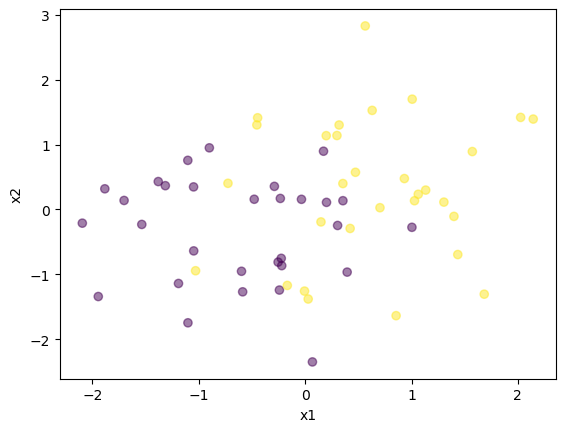

In [122]:
plt.scatter(x_train_t[:,0], x_train_t[:,1], alpha=0.5,c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')

## Perform K-fold cross validation


In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

- Decide parameter(s) in the model you want to tune. Here we will simply choose one parameter to tune which is hidden layer and sizes.
- Create the space to search using a python dictionary.
- Use `GridSearchCV`. It performs K-fold cross validation for each possible option in the space to search. 

In [6]:
from sklearn.model_selection import GridSearchCV

In [11]:
mlp_grid ={'hidden_layer_sizes':[(2),(5),(10),(15),(20),(50),(50,50),(100,100),(200,200),(100,100,100),(200,200,200),(500,500,500),(1000,1000,1000)]}

In [12]:
nn_model = MLPClassifier (max_iter=5000,
                           activation = 'relu',
                           solver='adam',batch_size=5,# mini batch
                           n_iter_no_change=10,
                           early_stopping=False)#early stopping
clf = GridSearchCV(nn_model, 
                   param_grid = mlp_grid,
                   scoring = 'accuracy',
                   cv = 5, 
                   n_jobs = 4, #parallel processing to reduce computation time
                   return_train_score = True)
clf.fit(x_train_t,y_train)

/Users/soibamb/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(batch_size=5, max_iter=5000),
             n_jobs=4,
             param_grid={'hidden_layer_sizes': [2, 5, 10, 15, 20, 50, (50, 50),
                                                (100, 100), (200, 200),
                                                (100, 100, 100),
                                                (200, 200, 200),
                                                (500, 500, 500),
                                                (1000, 1000, 1000)]},
             return_train_score=True, scoring='accuracy')

## View results from each fold

- `cv_results_` is a dictionary
- `cv_results_['mean_train_score']` score (in this case accuracy) on train set averaged over k -folds
- `cv_results_['mean_test_score']` score (in this case accuracy) on test set (1 validation fold) averaged over k-folds
- `cv_results_['std_train_score']` standard deviation of score (in this case accuracy) on training 
- `cv_results_['std_test_score']` standard deviation of score (in this case accuracy) on validation (1 validation fold at a time).

In [13]:
clf.cv_results_

{'mean_fit_time': array([ 0.23830662,  0.30121388,  0.51896429,  0.5800283 ,  0.60567732,
         0.69321656,  0.6340436 ,  0.72260051,  1.87658615,  0.88295202,
         1.18279719, 10.78968244, 35.63747544]),
 'std_fit_time': array([ 0.09877415,  0.08886288,  0.17025455,  0.13744205,  0.2937768 ,
         0.30545299,  0.0621088 ,  0.08779658,  0.51448712,  0.17431143,
         0.25866395,  1.93204548, 13.14437731]),
 'mean_score_time': array([0.00036731, 0.00033431, 0.00038948, 0.00037546, 0.00037293,
        0.00038843, 0.00037436, 0.00057273, 0.00091009, 0.00045948,
        0.00372381, 0.00442705, 0.00457134]),
 'std_score_time': array([1.65803624e-05, 1.25783822e-05, 2.70915693e-05, 5.23247908e-05,
        1.93100799e-05, 2.97102077e-05, 1.12167263e-05, 3.17390471e-04,
        5.02517807e-04, 3.26417239e-05, 1.50143775e-03, 4.68187397e-03,
        2.14654875e-03]),
 'param_hidden_layer_sizes': masked_array(data=[2, 5, 10, 15, 20, 50, (50, 50), (100, 100), (200, 200),
            

### Plot accuracy on training and validation vs model complexity

- error bars = standard error of mean (SE) (SE = $\frac{std}{\sqrt(n)}$), `n` = number of items the mean was calculated for.
- n = 5 since we are doing 5-fold cross validation

Text(0, 0.5, 'Accuracy')

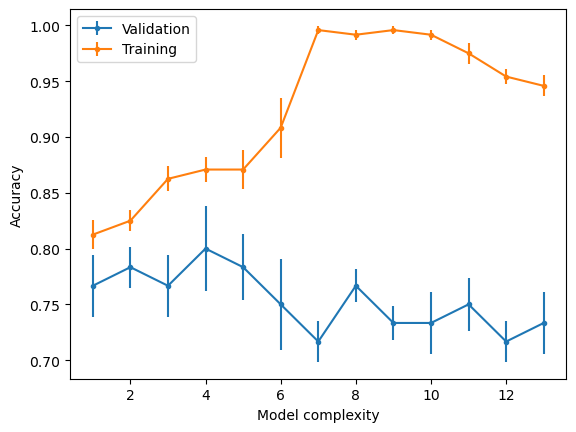

In [14]:
plt.errorbar(range(1,1+len(mlp_grid['hidden_layer_sizes'])),clf.cv_results_['mean_test_score'],clf.cv_results_['std_test_score']/np.sqrt(5),marker='.')
plt.errorbar(range(1,1+len(mlp_grid['hidden_layer_sizes'])),clf.cv_results_['mean_train_score'],clf.cv_results_['std_train_score']/np.sqrt(5),marker='.')
plt.legend(['Validation','Training'])
plt.xlabel('Model complexity')
plt.ylabel('Accuracy')

### Best model based on higher validation score (accuracy)

In [15]:
print('best parameters ',clf.best_params_)
print('best validation score ', clf.best_score_)
best_model = clf.best_estimator_

best parameters  {'hidden_layer_sizes': 15}
best validation score  0.8


### Retrain model using the entire train set with best parameters

- Based on k-fold cross validation analysis, we choose two models to illustrate.
- here we retrain models (best model, complex) on the entire train data set


In [16]:
nn_model_complex =MLPClassifier (hidden_layer_sizes=(1000,1000,1000),max_iter=1000,
                           activation = 'relu',
                           solver='adam',batch_size=5,# mini batch
                           n_iter_no_change=10,
                           early_stopping=False) #early stopping
nn_model_balance =MLPClassifier (hidden_layer_sizes=(15),max_iter=1000,
                           activation = 'relu',
                           solver='adam',batch_size=5,# mini batch
                           n_iter_no_change=10,
                           early_stopping=False) #early stopping

nn_model_complex.fit(x_train_t,y_train)
nn_model_balance.fit(x_train_t,y_train)

MLPClassifier(batch_size=5, hidden_layer_sizes=15, max_iter=1000)

### Predictions on the entire train and testing set

In [17]:
print('\n====best model')
print("Training accuracy ",accuracy_score(y_train,nn_model_balance.predict(x_train_t)))
print("Testing accuracy ",accuracy_score(y_test,nn_model_balance.predict(x_test_t)))


print('\n====overfitted model')
print("Training accuracy ",accuracy_score(y_train,nn_model_complex.predict(x_train_t)))
print("Testing accuracy ",accuracy_score(y_test,nn_model_complex.predict(x_test_t)))


====best model
Training accuracy  0.8166666666666667
Testing accuracy  0.745

====overfitted model
Training accuracy  0.9333333333333333
Training accuracy  0.7


- Overfitted has much higher gap between train and test accuracy

## Visualize boundaries

- create a grid of points
- predict on the points
- plot them as one color if predicted one class and different color if predicted the other class. 
- plot the training set data

In [18]:
def plot_result(model,sample,class_labels, linrange=(-2.2,2.2,101)):
    xmin, xmax, npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
    grid = np.c_[gridx1.flatten(), gridx2.flatten()]
    probs = model.predict_proba(grid)
    y_pred = model.predict(grid)
    plt.pcolor(gridx1, gridx2, y_pred.reshape(npoints,npoints), cmap='cool')
    plt.title('Training set')

    plt.colorbar()
    plt.scatter(sample[:,0], sample[:,1], c=class_labels, cmap='plasma', alpha=0.5, marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

### Decision boundary (best model)

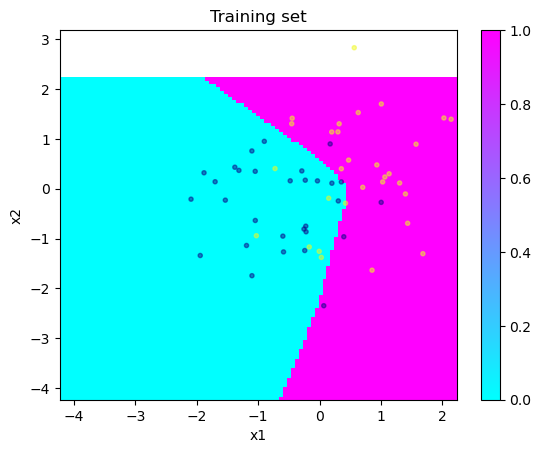

In [19]:
plot_result(nn_model_balance,x_train_t,y_train, linrange=(-4.2,2.2,101))

### Decision boundary (overfitted model)

- The model trying really hard to capture all local variations.

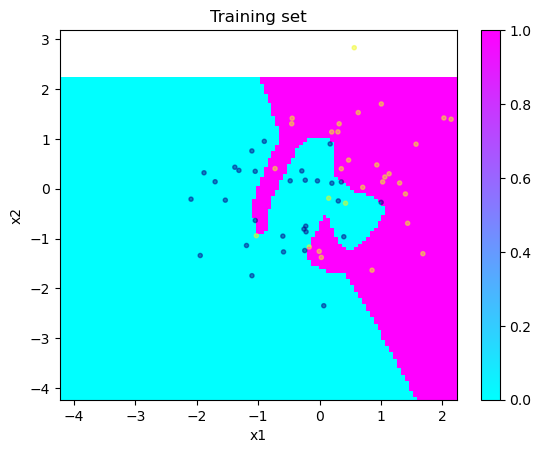

In [20]:
plot_result(nn_model_complex,x_train_t,y_train, linrange=(-4.2,2.2,101))

### Can we do better (Let's tune more parameters)

- Goal is to increase accuracy on the testing set and average validation accuracy without overfitting.
- Note we only tuned one hyperparameter.
- We can tune more (e.g: hidden layers, early_stopping, solver)

In [29]:
mlp_grid_new ={'hidden_layer_sizes':[(10),(15),(20),50,(50,50),(100,100),(200,200),(100,100,100),(200,200,200),(500,500,500),(1000,1000,1000)],
               'early_stopping':[True,False]}

In [30]:
nn_model_new = MLPClassifier(max_iter=5000,
                            activation = 'relu',
                            batch_size=5,
                            n_iter_no_change=10,
                            solver = 'adam')
clf_new = GridSearchCV(nn_model_new, 
                   param_grid = mlp_grid_new,
                   scoring = 'accuracy',
                   cv = 5,
                   n_jobs = 4,
                   return_train_score = True)
clf_new.fit(x_train_t,y_train)

/Users/soibamb/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(batch_size=5, max_iter=5000),
             n_jobs=4,
             param_grid={'early_stopping': [True, False],
                         'hidden_layer_sizes': [10, 15, 20, 50, (50, 50),
                                                (100, 100), (200, 200),
                                                (100, 100, 100),
                                                (200, 200, 200),
                                                (500, 500, 500),
                                                (1000, 1000, 1000)]},
             return_train_score=True, scoring='accuracy')

### Best model based on validation score

In [31]:
print('best parameters ',clf_new.best_params_)
print('best validation score ', clf_new.best_score_)
best_model_new = clf_new.best_estimator_

best parameters  {'early_stopping': True, 'hidden_layer_sizes': (500, 500, 500)}
best validation score  0.8166666666666668


### Retrain on entire training set

In [33]:
nn_model_new = MLPClassifier (hidden_layer_sizes=(500,500,500),max_iter=5000,
                           activation = 'relu',
                           solver='adam',batch_size=5,# mini batch
                           n_iter_no_change=10,
                           early_stopping=True)
nn_model_new.fit(x_train_t,y_train)

MLPClassifier(batch_size=5, early_stopping=True,
              hidden_layer_sizes=(500, 500, 500), max_iter=5000)

In [34]:
print('\n====best model')
print("Training accuracy ",accuracy_score(y_train,nn_model_new.predict(x_train_t)))
print("Testing accuracy ",accuracy_score(y_test,nn_model_new.predict(x_test_t)))


====best model
Training accuracy  0.8166666666666667
Testing accuracy  0.7675


- This is better accuracy on the testing set
- less overfitting 
- better results when using `early stopping = True`
- note that model with hidden layers (200,200,200) with early stopping = True will have different weights compared to early stopping=False

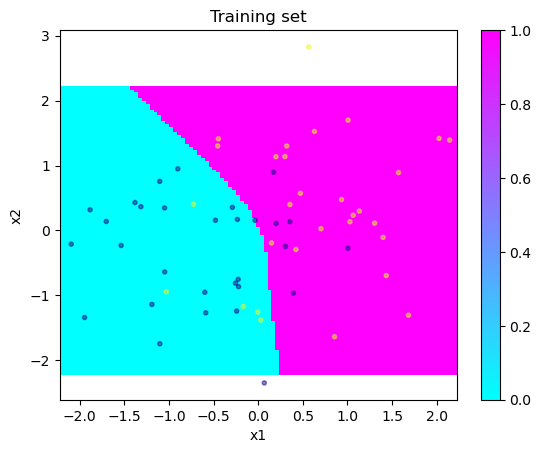

In [35]:
plot_result(nn_model_new,x_train_t,y_train)